<a href="https://colab.research.google.com/github/JoiceJesus/Redes-Neurais/blob/main/atv_pratica_1_pre_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sklearn.preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html

In [10]:
#conectando o drive manualmente
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np # manipulação de vetores e arreys
import pandas as pd # manipulação de dados

import seaborn as sns # is a Python data visualization library based on matplotlib
from matplotlib.cbook import boxplot_stats # matplotlib.cbook: A collection of utility functions and classe. boxplot_stats: visualização de grafico baseado em quartius.
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from joblib import Parallel, delayed
import multiprocessing as mp

In [12]:
#carregando os dados

dados = pd.read_csv('/content/drive/MyDrive/2022.2/Cursos Livres/Inteligência Artificial/Materiais de Aula/Aula 2/toy.csv')
dados

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.00,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.00,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.00,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.00,S
...,...,...,...,...,...,...,...,...,...
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N


In [13]:
# visualizando as primeiras instâncias
dados.head()

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.0,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.0,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.0,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.0,S


In [14]:
# visualizando as ultimas instâncias
dados.tail()

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N
209,844339630,F,4601.64,RS,0.00,2.08,106.92,460.16,N


In [16]:
# verificando o tamanho da matriz
dados.shape

(210, 9)

In [15]:
# visualizando informações dos atributos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpf               210 non-null    int64  
 1   sexo              210 non-null    object 
 2   salario           205 non-null    float64
 3   estado            210 non-null    object 
 4   poupanca          205 non-null    float64
 5   altura            210 non-null    float64
 6   peso              210 non-null    float64
 7   total.emprestimo  205 non-null    float64
 8   financiamento     205 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 14.9+ KB


In [17]:
# nomes dos atributos
dados.columns

Index(['cpf', 'sexo', 'salario', 'estado', 'poupanca', 'altura', 'peso',
       'total.emprestimo', 'financiamento'],
      dtype='object')

In [18]:
# quantidade de instâncias por atributos
dados.count()

cpf                 210
sexo                210
salario             205
estado              210
poupanca            205
altura              210
peso                210
total.emprestimo    205
financiamento       205
dtype: int64

In [19]:
# estatísticas dos atributos
dados.describe()

,cpf,salario,poupanca,altura,peso,total.emprestimo
count,2.100000e+02,205.000000,205.000000,210.000000,210.000000,205.000000
mean,5.313211e+08,5798.792683,3907.507220,2.240238,92.825905,154.011610
std,2.789570e+08,3923.162459,6243.935327,2.131078,19.849117,228.496524
min,1.959378e+07,4000.000000,-1000.000000,1.400000,55.550000,0.000000
25%,3.015684e+08,4581.440000,0.000000,1.620000,77.975000,0.000000
50%,5.711293e+08,5094.260000,0.000000,1.785000,95.180000,0.000000
75%,7.661590e+08,5489.120000,7306.130000,1.977500,106.230000,443.270000
max,9.999668e+08,25715.660000,19528.880000,11.980000,129.890000,600.000000


In [20]:
#visualização dos dados
dados

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.00,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.00,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.00,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.00,S
...,...,...,...,...,...,...,...,...,...
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N


In [21]:
# renomeando atributo
dados.rename(columns={'cpf':'CPF','sexo':'sexo','estado':'Estado','poupanca':'Poupanca','altura':'Altura','peso':'Peso','total.emprestimo':'Emprestimo','financiamento':'Financiamento'})

,CPF,sexo,salario,Estado,Poupanca,Altura,Peso,Emprestimo,Financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.00,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.00,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.00,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.00,S
...,...,...,...,...,...,...,...,...,...
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N


In [22]:
# verificando valores unicos de um atributo
dados['altura'].unique()

array([ 1.93,  1.84,  1.66,  1.73,  2.05,  1.69,  1.99,  1.89,  1.74,
        1.43,  2.03,  2.04,  1.96,  1.72,  1.41, 11.4 ,  1.59,  1.49,
        1.68,  2.08,  1.9 ,  1.81,  1.8 ,  1.91,  1.65,  1.76,  1.78,
        1.54,  1.7 ,  1.87,  2.06,  2.07,  1.47,  1.44,  1.57,  1.97,
        1.4 ,  1.67, 11.98,  1.5 ,  2.01,  1.48,  2.02,  1.62,  1.92,
       11.7 ,  1.53,  1.77,  1.45,  2.09,  1.85,  1.64,  2.  ,  1.63,
        1.95, 11.89,  1.88,  1.58,  1.42, 11.69,  1.79,  2.1 ,  1.61,
        1.56,  1.71,  1.46,  1.83,  1.86,  1.98,  1.52, 11.71, 11.63,
        1.82,  1.55, 11.58, 11.72, 11.73])

<Axes: ylabel='Frequency'>

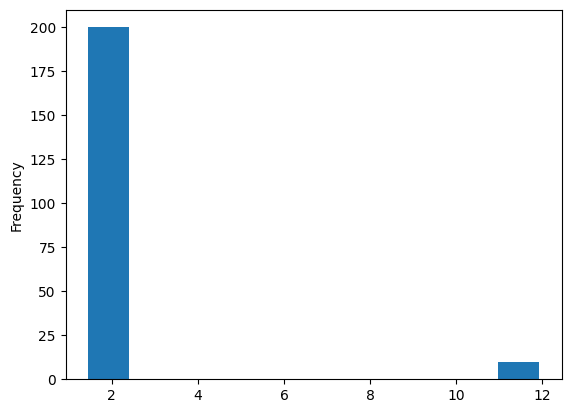

In [23]:
# plot do histograma de um atributo
dados['altura'].plot.hist(rwidth=0.9)

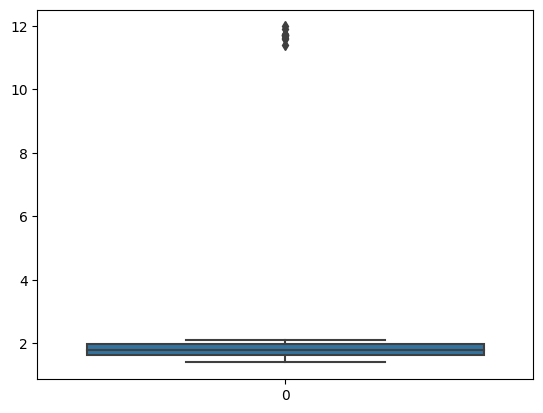

In [24]:
#Boxplot: gráfico utilizado para avaliar a distribuição empírica do dados
ax = sns.boxplot(data=dados['altura'])

In [25]:
#Instâncias consideradas outilears
outliers = boxplot_stats(dados["altura"]).pop(0)['fliers']
np.where(dados["altura"].isin(outliers))

(array([ 19,  52,  67,  82,  99, 141, 144, 160, 168, 197]),)

In [26]:
#matriz com outliers
dados.shape

(210, 9)

In [27]:
#retirando outliers
dados.drop(np.where(dados["altura"].isin(outliers))[0],inplace=True)

In [28]:
#matrizes sem outliers
dados.shape

(200, 9)

<Axes: >

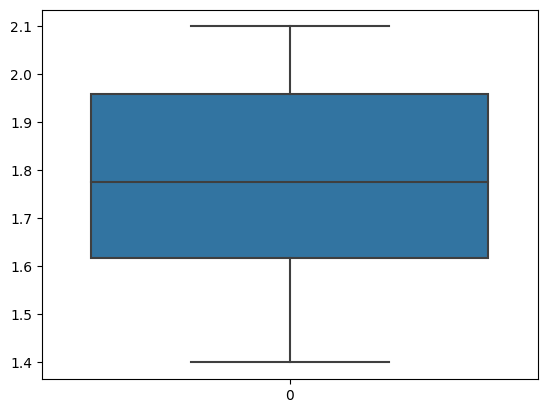

In [29]:
#novo boxplot
sns.boxplot(dados['altura'])

<Axes: ylabel='Frequency'>

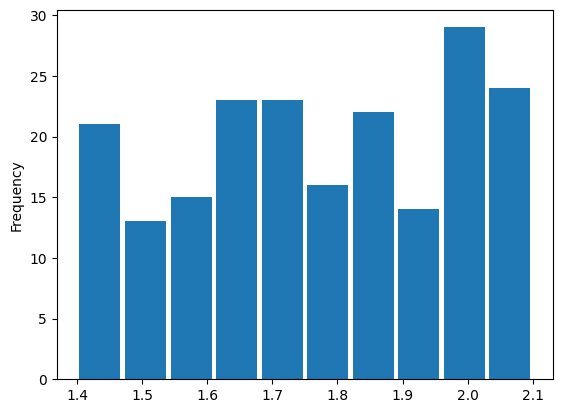

In [30]:
#histograma sem outliers
dados['altura'].plot.hist(rwidth=0.9)


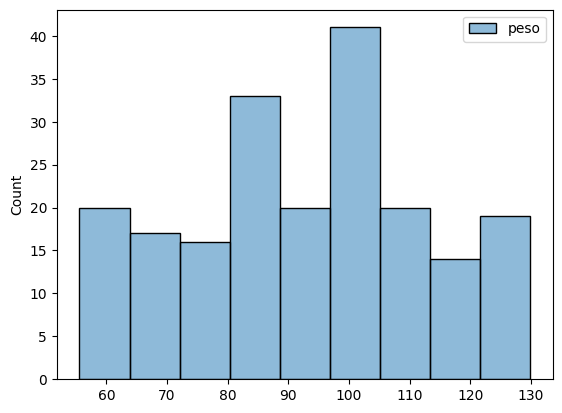

In [31]:
ax = sns.histplot(data=dados.iloc[:,6:7])

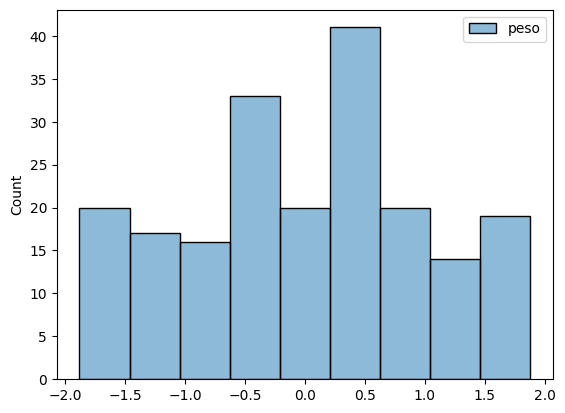

In [32]:
#Normalização/Padronização dos dados
scaler = StandardScaler()
norm_subset = pd.DataFrame(scaler.fit_transform(dados.iloc[:,6:7]), columns = ['peso'])
ax = sns.histplot(data=norm_subset)

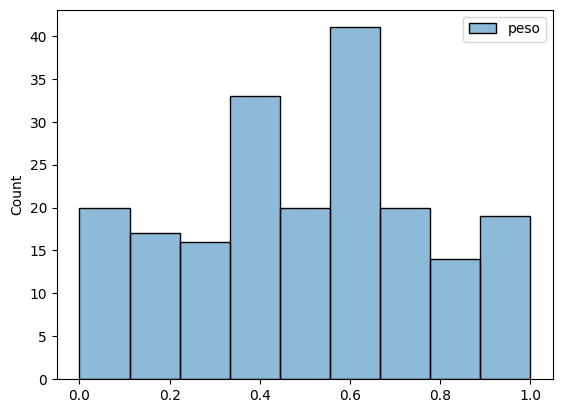

In [33]:
#Normalização
scaler = MinMaxScaler()
norm_subse = pd.DataFrame(scaler.fit_transform(dados.iloc[:,6:7]), columns = ['peso'])
x = sns.histplot(data=norm_subse)

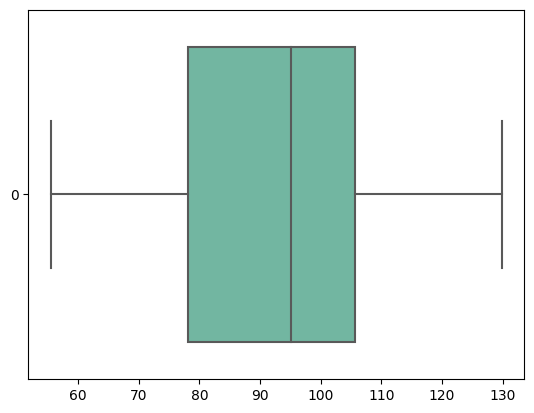

In [35]:
ax = sns.boxplot(data=dados['peso'], orient="h", palette="Set2")